In [ ]:
from google.colab import drive
drive.mount('/content/drive/')
import os
import cv2
import numpy as np

from google.colab.patches import cv2_imshow

Mounted at /content/drive/


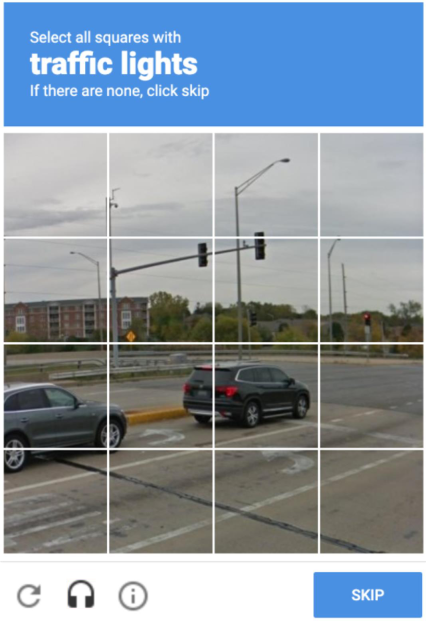

In [ ]:
# Import image 

path = '/content/drive/MyDrive/CS254/CS254-Project/Images/reCaptcha2.jpeg'
image = cv2.imread(path)

image_disp = cv2.resize(image, (int(image.shape[1]*0.4), int(image.shape[0]*0.4)),interpolation = cv2.INTER_AREA)
cv2_imshow(image_disp)

1403


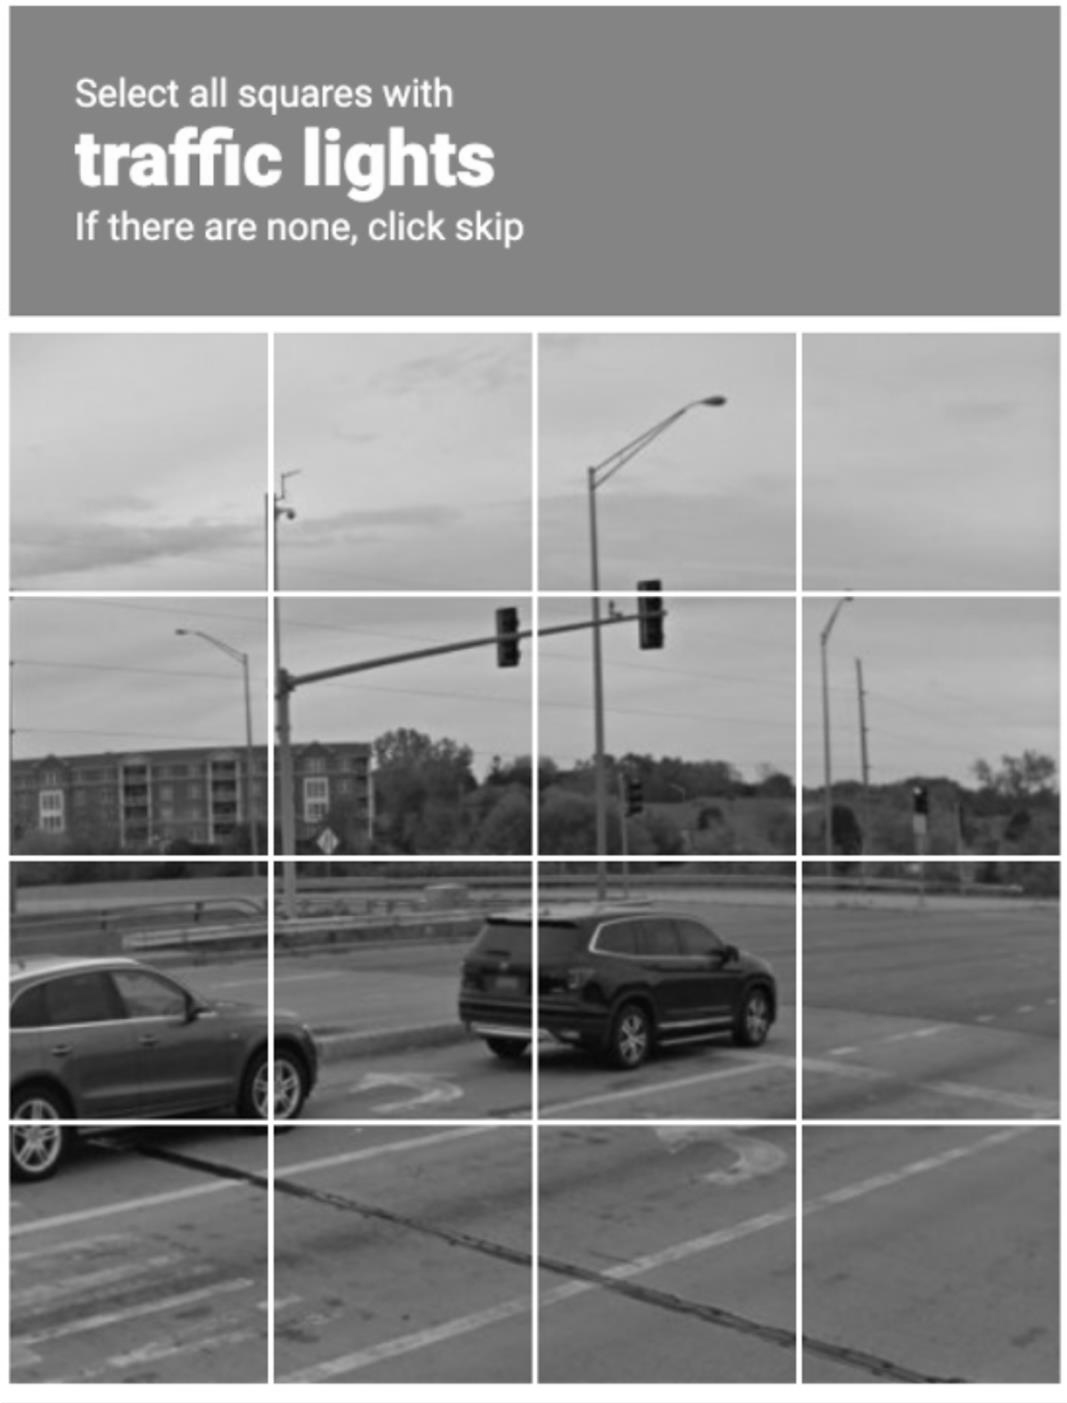

In [ ]:
# Gray scale

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_size = gray.shape
for i in range(image_size[0]):
    if gray[i,0] < 250:
        print(i)
        break

new_gray = np.zeros([i,image_size[1]])
for j in range(i):
    for k in range(image_size[1]):
        new_gray[j,k] = gray[j,k]

cv2_imshow(new_gray)

In [ ]:
# Cutting top & bottom and segmentation

horizontal = np.zeros([new_gray.shape[0],1])
vertical = np.zeros([new_gray.shape[1],1])

leftup = []
rightdown = []

for i in range(horizontal.shape[0]):
    horizontal[i,0] = np.mean(new_gray[i,:])

for i in range(vertical.shape[0]):
    vertical[i,0] = np.mean(new_gray[:,i])

for i in range(horizontal.shape[0]-1):
    for j in range(vertical.shape[0]-1):
        if horizontal[i,0] > 240 and horizontal[i+1,0] < 240 and vertical[j] > 240 and vertical[j+1] < 240:
            leftup.append([i+1,j+1])

leftup = np.asarray(leftup)
cut = leftup[1,0] - 2

cache_gray = np.zeros([new_gray.shape[0]-cut, new_gray.shape[1]])
for i in range(cut,new_gray.shape[0]):
    cache_gray[i-cut,:] = new_gray[i,:]

horizontal = np.zeros([cache_gray.shape[0],1])
vertical = np.zeros([cache_gray.shape[1],1])

leftup = []
rightdown = []

for i in range(horizontal.shape[0]):
    horizontal[i,0] = np.mean(cache_gray[i,:])

for i in range(vertical.shape[0]):
    vertical[i,0] = np.mean(cache_gray[:,i])

for i in range(horizontal.shape[0]-1):
    for j in range(vertical.shape[0]-1):
        if horizontal[i,0] > 240 and horizontal[i+1,0] < 240 and vertical[j] > 240 and vertical[j+1] < 240:
            leftup.append([i+1,j+1])

for i in range(horizontal.shape[0]-1):
    for j in range(vertical.shape[0]-1):
        if horizontal[i,0] < 240 and horizontal[i+1,0] > 240 and vertical[j] < 240 and vertical[j+1] > 240:
            rightdown.append([i,j])

leftup = np.asarray(leftup)
rightdown = np.asarray(rightdown)

image1


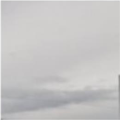

image2


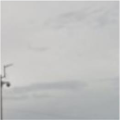

image3


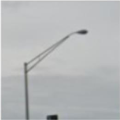

image4


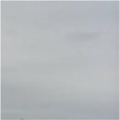

image5


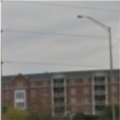

image6


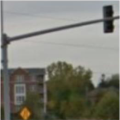

image7


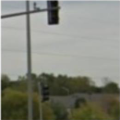

image8


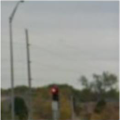

image9


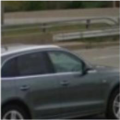

image10


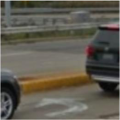

image11


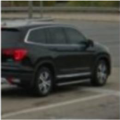

image12


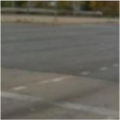

image13


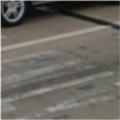

image14


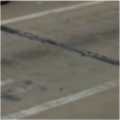

image15


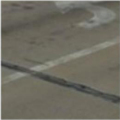

image16


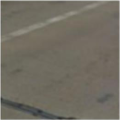

In [ ]:
# Display segments
image_predict = []

for i in range(leftup.shape[0]):
    cache_image = image[leftup[i,0]+cut:rightdown[i,0]+cut, leftup[i,1]:rightdown[i,1]]
    print("image" + str(i+1))
    cache_image = cv2.resize(cache_image, (120, 120),interpolation = cv2.INTER_AREA)
    image_predict.append(cache_image)
    cv2_imshow(cache_image)

image_predict = np.asarray(image_predict)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

model = load_model('/content/drive/MyDrive/CS254/CS254-Project/Model')
result = model.predict(image_predict)
print(result)
predict_class = np.argmax(result, axis=-1)
labels = np.array(['Hydrant','Stair','Car','Crosswalk','Palm','Bus','Other','Traffic Light','Motorcycle','Chimney','Bridge','Bicycle'])

In [ ]:
image_output = image
for i in range(leftup.shape[0]):
    cv2.putText(image_output, labels[predict_class[i]], (leftup[i,1]+10,leftup[i,0]+cut+30), cv2.FONT_HERSHEY_SIMPLEX, 
                    1, (0,0,255), 2, cv2.LINE_AA)
    if predict_class[i] == 3:
        cv2.rectangle(image_output, (leftup[i,1],leftup[i,0]+cut), (rightdown[i,1],rightdown[i,0]+cut), (0,0,255), 5)

cv2_imshow(image_output)